# Exploration  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from cdlib import viz
import os
import sys
import warnings
warnings.filterwarnings('ignore')
import networkx as nx
#from pyvis import network as net
from cdlib import algorithms, viz
from difflib import get_close_matches
from collections import Counter
from difflib import SequenceMatcher

Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'graph_tool'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer'}


# Movies

In [3]:
data_movies = pd.read_csv("./CSV_files/movies_communities_metadata.csv")

In [4]:
data_movies['Movie_release_year'] = data_movies['Movie_release_date'].str.split(
    '-').str[0].astype(float)
# drop the actor date of birth column
data_movies.drop(['Movie_release_date'], axis=1, inplace=True)
# show the number of missing values in the actor year of birth column
data_movies['Movie_release_year'].isnull().sum()

KeyError: 'Movie_release_date'

In [13]:
data_movies['Movie_genres']

0        {'/m/04t36': 'Musical', '/m/01z4y': 'Comedy', ...
1        {'/m/04xvh5': 'Costume drama', '/m/082gq': 'Wa...
2        {'/m/0hj3myq': "Children's/Family", '/m/04t36'...
3        {'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...
4        {'/m/0lsxr': 'Crime Fiction', '/m/07s9rl0': 'D...
                               ...                        
16609    {'/m/0gf28': 'Parody', '/m/09n5t_': 'Americana...
16610    {'/m/05p553': 'Comedy film', '/m/02l7c8': 'Rom...
16611    {'/m/07s9rl0': 'Drama', '/m/02kdv5l': 'Action'...
16612    {'/m/0lsxr': 'Crime Fiction', '/m/01jfsb': 'Th...
16613    {'/m/06n90': 'Science Fiction', '/m/0gw5n2f': ...
Name: Movie_genres, Length: 16614, dtype: object

## Number of movies by communities

In [6]:
nb_movie = []
for com in range(1,21):
    nb_movie.append(len(data_movies[~(data_movies[str(com)] == 0)]))

[2447, 2826, 2835, 1453, 1996, 732, 676, 595, 510, 489, 999, 188, 401, 204, 270, 270, 215, 139, 98, 94] 20


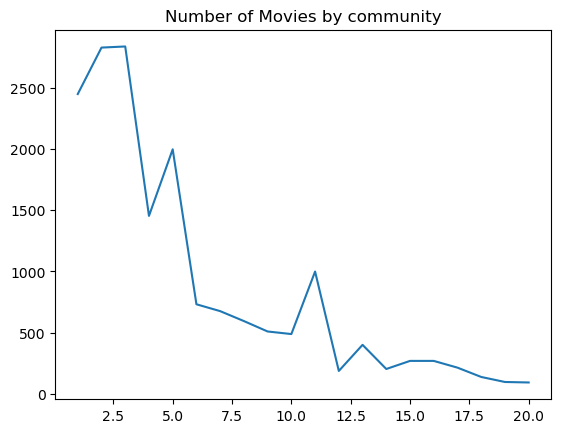

In [7]:
plt.plot(range(1,21),nb_movie)
print(nb_movie, len(nb_movie))
ax = plt.title('Number of Movies by community')

In [8]:
data_mov1 = data_movies[~(data_movies["1"] == 0)]
data_mov2 = data_movies[~(data_movies["2"] == 0)]
data_mov4 = data_movies[~(data_movies["4"] == 0)]

In [9]:
data_mov4.Movie_countries.unique()
data_mov1.sample(3)

AttributeError: 'DataFrame' object has no attribute 'Movie_countries'

## Movies Distribution per Year

16070.0 movies in total
16070.0


Text(0.5, 1.0, 'Movie Distribution over Years and Communities')

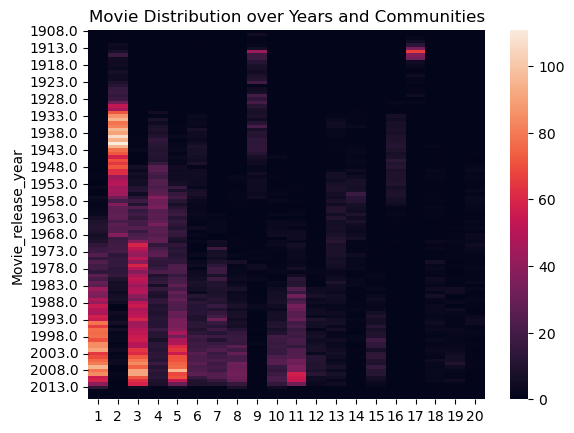

In [ ]:
coms  =  np.arange(1,21)
data_movies['Sum_com'] = data_movies[coms.astype(str)].sum(axis=1)
data_movies[coms.astype(str)] = data_movies.apply(lambda x : x[coms.astype(str)]/x.Sum_com,axis=1)
data_movies['Sum_com'] = data_movies.apply(lambda x : x.Sum_com/x.Sum_com,axis=1)
movies_year_com = data_movies.groupby('Movie_release_year').agg('sum')
#movies_year_com.drop(['Unnamed: 0','Wikipedia_movie_ID','Movie_box_office_revenue','Movie_runtime'],axis=1,inplace=True)
movies_year_com.drop(['Unnamed: 0','Wikipedia_movie_ID'],axis=1,inplace=True)

#Sanity Check
print(movies_year_com['Sum_com'].sum(),'movies in total')
print(movies_year_com[coms.astype(str)].sum(axis=1).sum())

movies_year_com.drop(['Sum_com'],axis=1,inplace=True)
sns.heatmap(data=movies_year_com)
plt.title('Movie Distribution over Years and Communities')

> retravailler le graphe pour normaliser chaque colonne sur 100 ?

# Actors

In [ ]:
data = pd.read_csv("./CSV_files/top_20_communities_all_actors_wikidata_with_country_occupation.csv")
# As we did with the previous column, we will get the year from the actor date of birth column
data['Actor_year_of_birth'] = data['Actor_date_of_birth'].str.split(
    '-').str[0]
# drop the actor date of birth column
data.drop(['Actor_date_of_birth'], axis=1, inplace=True)
# show the number of missing values in the actor year of birth column
data['Actor_year_of_birth'].isnull().sum()
data.Actor_year_of_birth =  pd.to_datetime(data.Actor_year_of_birth)
data['Actor_year_of_birth'] = data['Actor_year_of_birth'].dt.year

In [ ]:
data[data['Actor_name']=='Prabhu Deva']
data[data['Actor_name']=='James Garner']

,Actor_name,connectivity,actor_gender,Actor_ethnicity,Freebase_actor_ID,community,Wikidata_actor_id,actor_country_of_citizenship,actor_occupation,Actor_year_of_birth
234,James Garner,17,M,/m/07hwkr,/m/016kkx,1,Q108510,United States of America,"['actor', 'television actor', 'film actor', 'f...",1928.0


### Community Sizes

community 17: 102 actors
community 18: 83 actors
community 10: 212 actors
community 11: 190 actors


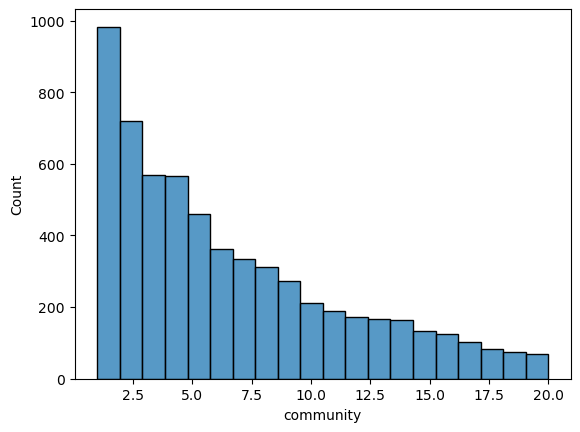

In [ ]:
data[data['community']==4]
sns.histplot(data,x="community",bins=20)
print("community 17: {} actors".format(len(data[data['community']==17])))
print("community 18: {} actors".format(len(data[data['community']==18])))

print("community 10: {} actors".format(len(data[data['community']==10])))
print("community 11: {} actors".format(len(data[data['community']==11])))
# the top 10 communities have more than 200 people in it. 

Text(0, 0.5, 'Number of Actors')

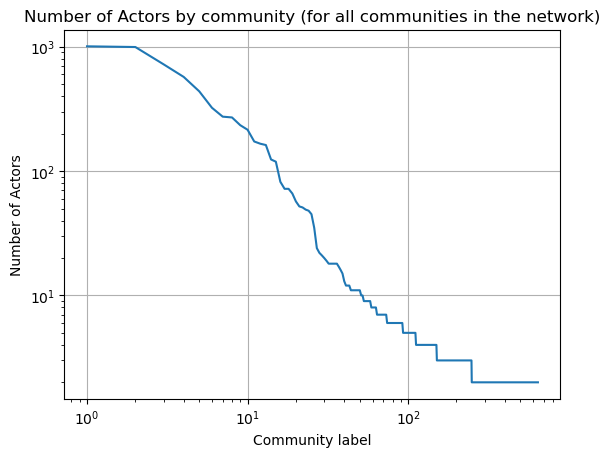

In [ ]:
com_sizes = pd.read_csv('./CSV_files/community_sizes.csv')
sns.lineplot(data=com_sizes,x='community',y='size')
plt.yscale('log')
plt.grid('on')
plt.xscale('log')
plt.title('Number of Actors by community (for all communities in the network)')
plt.xlabel('Community label')
plt.ylabel('Number of Actors')
#plt.vlines(17,0,1000)

In [ ]:
com_sizes

,Unnamed: 0,community,size
0,0,1,1008
1,1,2,995
2,2,3,722
3,3,4,572
4,4,5,438
...,...,...,...
638,638,639,2
639,639,640,2
640,640,641,2
641,641,642,2


### Actors and Birthyears

<AxesSubplot:xlabel='Actor_year_of_birth', ylabel='community'>

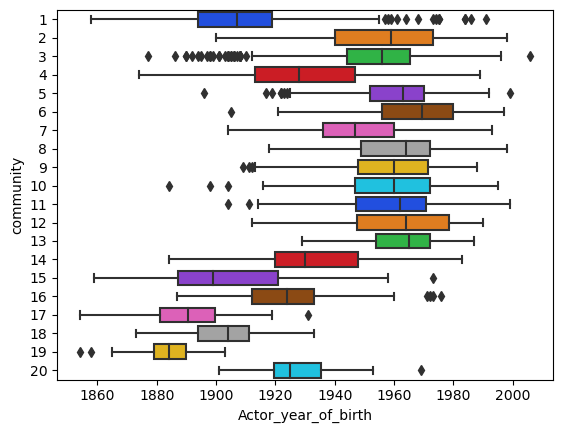

In [ ]:
sns.boxplot(data=data, x="Actor_year_of_birth", y="community",orient = "h",palette = 'bright')

### Nationalities of Actors

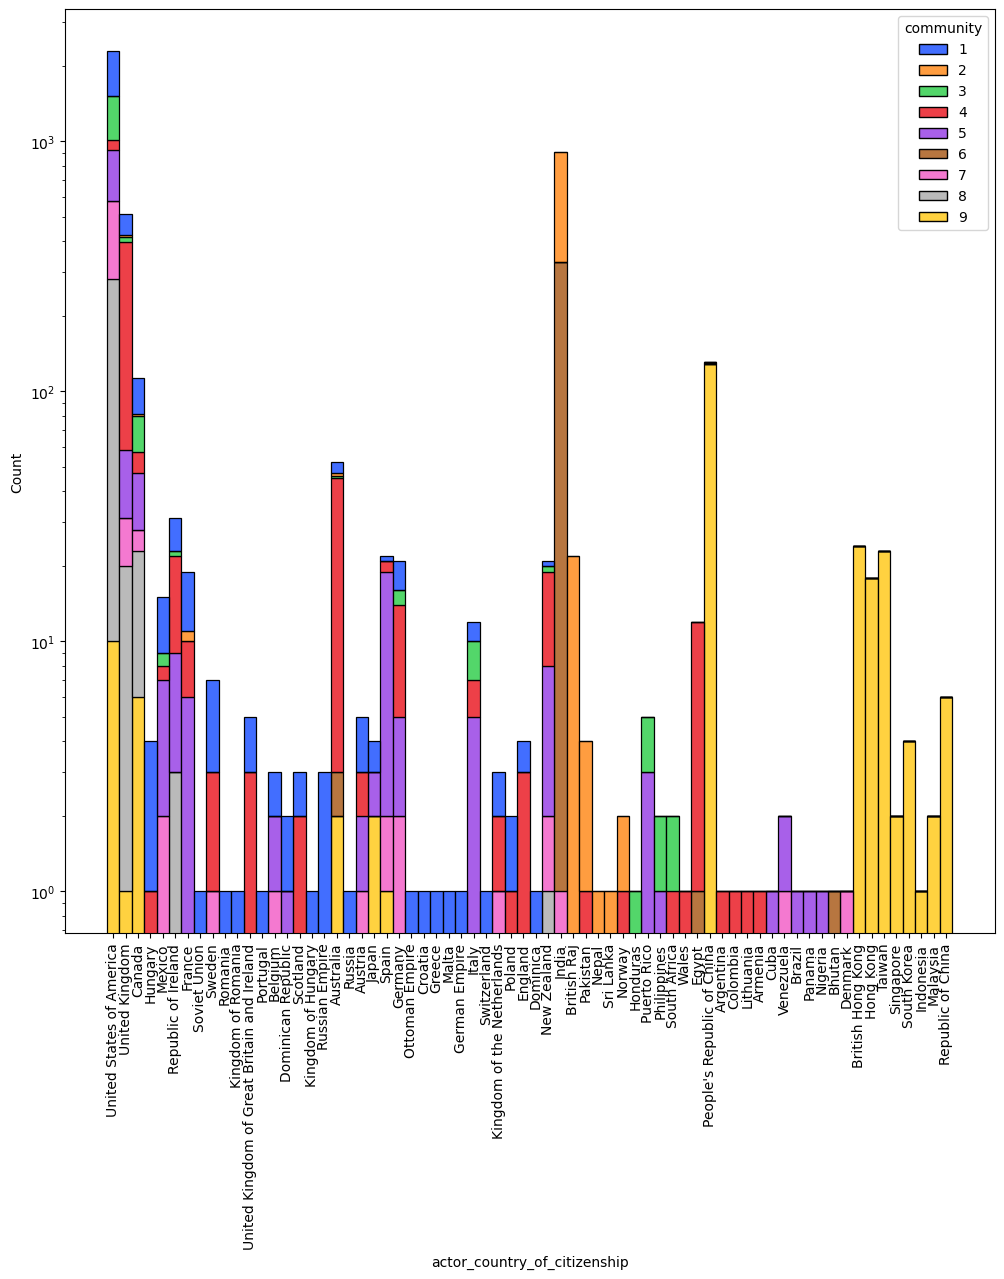

In [ ]:
plt.figure(figsize = (12,12))
sns.histplot(data= data[data.community < 10], x = 'actor_country_of_citizenship',hue='community', multiple = 'stack', palette = 'bright')
ax = plt.xticks(rotation = 90)
plt.yscale('log')

# Community 1

In [ ]:
d1 = data[data['community']==1]
print('number of actors = ', len(d1))

print(d1.actor_country_of_citizenship.unique())
print(len(d1.actor_country_of_citizenship.unique()),"nationalities")
#sns.histplot(data = d1, x = 'actor_country_of_citizenship')
sns.barplot(x=d1['actor_country_of_citizenship'].value_counts().index, y=d1['actor_country_of_citizenship'].value_counts().values,palette = 'bright')
ax = plt.xticks(rotation = 90)
plt.yscale('log')

NameError: name 'data' is not defined

> Cleaning need to be done on the nationalities 

Hungary = Kingdom of Hungary \\ 
Kingdom of the Netherlands

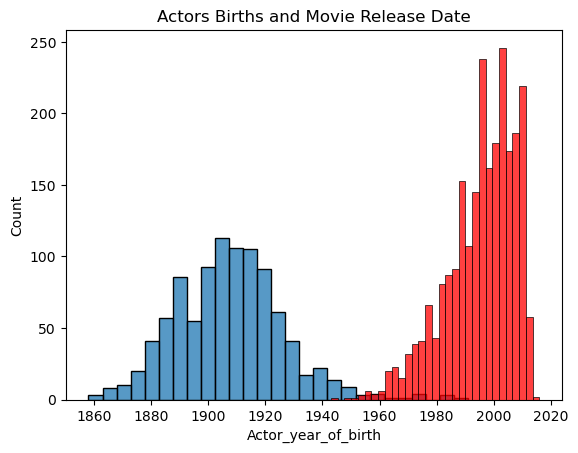

In [ ]:
sns.histplot(data= d1, x="Actor_year_of_birth")
sns.histplot(data= data_mov1, x='Movie_release_year',color='red')
ax = plt.title('Actors Births and Movie Release Date')

> plot the distribution of the average age when acting a movie ? 

In [ ]:
data_mov1.Movie_genres.unique()

array(['{"/m/04t36": "Musical", "/m/0hfjk": "Western"}',
       '{"/m/06ppq": "Silent film", "/m/0219x_": "Indie", "/m/082gq": "War film", "/m/06l3bl": "Epic", "/m/01g6gs": "Black-and-white", "/m/07s9rl0": "Drama", "/m/0hj3mws": "Biopic [feature]", "/m/0hj3n6f": "Historical Epic"}',
       '{"/m/0lsxr": "Crime Fiction", "/m/02n4kr": "Mystery", "/m/01jfsb": "Thriller", "/m/07s9rl0": "Drama", "/m/02wtdps": "Crime Thriller"}',
       '{"/m/03btsm8": "Action/Adventure", "/m/0hfjk": "Western", "/m/06nbt": "Satire", "/m/01z4y": "Comedy", "/m/0hj3mzj": "Comedy Western"}',
       '{"/m/01jfsb": "Thriller", "/m/0lsxr": "Crime Fiction", "/m/07s9rl0": "Drama", "/m/02xh1": "Film noir", "/m/02n4kr": "Mystery"}',
       '{"/m/03btsm8": "Action/Adventure", "/m/0hfjk": "Western", "/m/015w9s": "Television movie"}',
       '{"/m/03btsm8": "Action/Adventure", "/m/0hfjk": "Western", "/m/07s9rl0": "Drama", "/m/03bxz7": "Biographical film", "/m/01g6gs": "Black-and-white"}',
       '{"/m/03btsm8": "Action/Ad

In [ ]:
data_mov1

,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,1,...,12,13,14,15,16,17,18,19,20,Movie_release_year
7,7,10275424,/m/02q74ng,Woman Hungry,NaN,65.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/0hfjk"": ""Western""}",1,...,0,0,0,0,0,0,0,0,0,1930.0
9,9,14631844,/m/03grb4v,Joan the Woman,NaN,138.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi...",5,...,0,0,0,0,0,0,0,0,0,1917.0
12,12,12788657,/m/02x4zpv,The Boston Strangler,17810894.0,116.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/02n4kr"": ""My...",1,...,0,0,0,0,0,0,0,0,0,1968.0
45,45,2051395,/m/06hp9q,The Hallelujah Trail,NaN,159.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/0hfjk"":...",1,...,0,0,0,0,0,0,0,0,0,1965.0
79,79,1748912,/m/05sxb6,The Killers,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0lsxr"": ""Crime F...",1,...,0,0,0,0,0,0,0,0,0,1964.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9424,9424,1443103,/m/051_vd,The Professionals,19537346.0,117.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/0hfjk"":...",2,...,0,0,0,0,0,0,0,0,0,1966.0
9428,9428,12629405,/m/02wysmp,Dakota,NaN,82.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/0hfjk"":...",2,...,0,0,0,0,0,0,0,0,0,1945.0
9434,9434,616805,/m/02x0cf,Kiss of Death,NaN,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0lsxr"": ""Crime F...",1,...,0,0,0,0,0,0,0,0,0,1947.0
9450,9450,16022316,/m/03ql11d,Love and Bullets,NaN,103.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",3,...,0,0,0,0,0,0,0,0,0,1979.0


> clean the dataset so that they print the year in the CSV files

# Community 2

['India' 'British Raj' 'Canada' 'Pakistan' nan 'Nepal'
 'United States of America' 'United Kingdom' 'Australia' 'Sri Lanka'
 'Norway' 'France']
12 nationalities


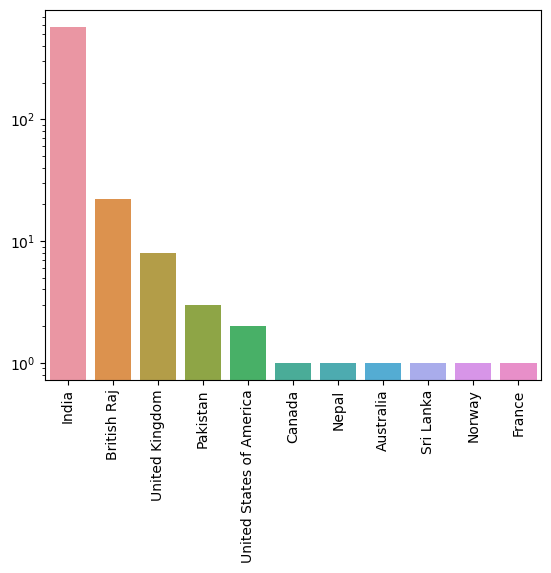

In [ ]:
d2 = data[data['community']==2]
print(d2.actor_country_of_citizenship.unique())
print(len(d2.actor_country_of_citizenship.unique()),"nationalities")
#sns.histplot(data = d2, x = 'actor_country_of_citizenship')
sns.barplot(x=d2['actor_country_of_citizenship'].value_counts().index, y=d2['actor_country_of_citizenship'].value_counts().values)
ax = plt.xticks(rotation = 90)
plt.yscale('log')

Way less represented nationalities (less invited people from elsewhere?)

In [ ]:
d2[(~(d2['actor_country_of_citizenship']=='India')& ~(d2['actor_country_of_citizenship']=='British Raj'))]
d2[(d2['actor_country_of_citizenship']=='France')]

,Actor_name,connectivity,actor_gender,Actor_ethnicity,Freebase_actor_ID,community,Wikidata_actor_id,actor_country_of_citizenship,actor_occupation,Actor_year_of_birth
1592,Kalki Koechlin,3,F,/m/03ts0c,/m/05h2g0r,2,Q3192216,France,"['stage actor', 'film actor', 'screenwriter', ...",1983.0


# Community 3 

['United States of America' 'Canada' 'United Kingdom' nan 'Germany'
 'Italy' 'Honduras' 'New Zealand' 'Australia' 'Puerto Rico' 'Philippines'
 'Mexico' 'South Africa' 'Republic of Ireland']
14 nationalities


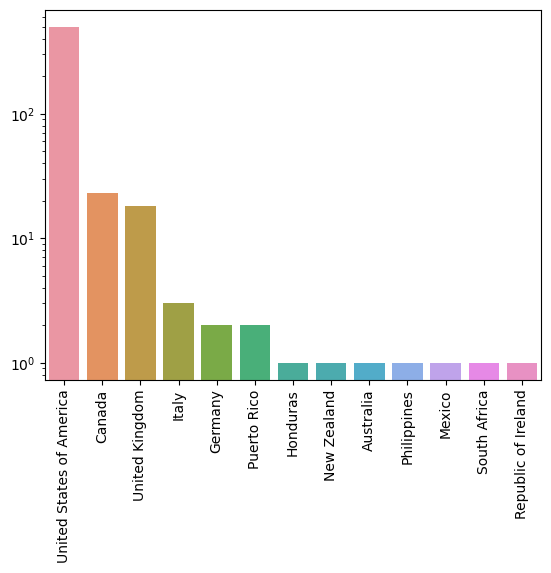

In [ ]:
d3 = data[data['community']==3]
print(d3.actor_country_of_citizenship.unique())
print(len(d3.actor_country_of_citizenship.unique()),"nationalities")
#sns.histplot(data = d3, x = 'actor_country_of_citizenship')
sns.barplot(x=d3['actor_country_of_citizenship'].value_counts().index, y=d3['actor_country_of_citizenship'].value_counts().values)
ax = plt.xticks(rotation = 90)
plt.yscale('log')

### Community 4

['United Kingdom' 'Canada' 'United States of America' 'Australia'
 'England' 'Scotland' 'New Zealand' 'Wales' 'Egypt' 'South Africa'
 'Germany' 'Republic of Ireland' 'Kingdom of the Netherlands'
 'United Kingdom of Great Britain and Ireland' 'France' nan
 "People's Republic of China" 'Italy' 'Sweden' 'Argentina' 'Norway'
 'Spain' 'Mexico' 'Pakistan' 'Poland' 'Hungary' 'Colombia' 'Lithuania'
 'Armenia' 'India' 'Austria']
31 nationalities


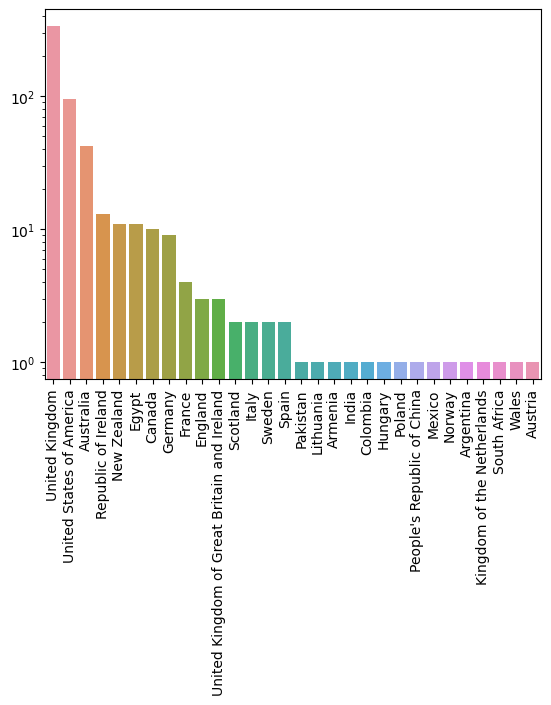

In [ ]:
d4 = data[data['community']==4]
print(d4.actor_country_of_citizenship.unique())
print(len(d4.actor_country_of_citizenship.unique()),"nationalities")
#sns.histplot(data = d4, x = 'actor_country_of_citizenship')
sns.barplot(x=d4['actor_country_of_citizenship'].value_counts().index, y=d4['actor_country_of_citizenship'].value_counts().values)
ax = plt.xticks(rotation = 90)
plt.yscale('log')